# 1. Import necessary libraries

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import cv2
import keras
from tensorflow.keras.utils import load_img, img_to_array

# 2. Get our pokemon images

In [3]:
image_dir = "F:\\Python_projects\\14. Similar_images\\PokemonData"

In [4]:
print(os.listdir(image_dir))

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

# 3. Preprocess images

## 3.1 - splitting data into train and validation sets

In [18]:
IMAGE_SIZE=64
BATCH_SIZE=32

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    image_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    image_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 6205 images belonging to 150 classes.
Found 615 images belonging to 150 classes.


# 4. Make and fit a model

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D((2,2)),
   
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
   
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
   
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
  
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
   
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(150, activation='softmax')])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
194/194 [==============================] - 55s 280ms/step - loss: 4.7915 - accuracy: 0.0147 - val_loss: 4.3620 - val_accuracy: 0.0374
Epoch 2/10
194/194 [==============================] - 54s 275ms/step - loss: 4.2129 - accuracy: 0.0559 - val_loss: 3.8439 - val_accuracy: 0.0976
Epoch 3/10
194/194 [==============================] - 51s 265ms/step - loss: 3.7930 - accuracy: 0.1102 - val_loss: 3.4261 - val_accuracy: 0.1691
Epoch 4/10
194/194 [==============================] - 54s 279ms/step - loss: 3.3480 - accuracy: 0.1770 - val_loss: 2.9891 - val_accuracy: 0.2488
Epoch 5/10
194/194 [==============================] - 54s 280ms/step - loss: 2.9490 - accuracy: 0.2453 - val_loss: 2.6445 - val_accuracy: 0.3252
Epoch 6/10
194/194 [==============================] - 55s 283ms/step - loss: 2.6963 - accuracy: 0.3023 - val_loss: 2.4013 - val_accuracy: 0.3805
Epoch 7/10
194/194 [==============================] - 55s 281ms/step - loss: 2.5173 - accuracy: 0.3304 - val_loss: 2.2457 - val_ac

In [24]:
model.save('my_model.h5')
model.save_weights("model_num.h5")

# 5. Evaluate a model

In [5]:
model = tf.keras.models.load_model('my_model.h5')

In [7]:
names = ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 
         'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 
         'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 
         'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 
         'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 
         'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 
         'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 
         'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 
         'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 
         'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 
         'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 
         'Ninetales', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Pidgeot', 'Pidgeotto', 
         'Pidgey', 'Pikachu', 'Pinsir', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Primeape', 'Psyduck', 
         'Raichu', 'Rapidash', 'Raticate', 'Rattata', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 
         'Seaking', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax', 'Spearow', 'Squirtle', 'Starmie', 'Staryu', 
         'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 
         'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos', 'Zubat']

In [33]:
image = load_img('data\\test\\image11.jpg', target_size=(64, 64)) 
image = img_to_array(image) 
image = np.expand_dims(image, axis=0)
image /= 255. 


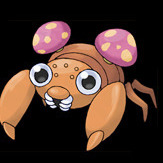

In [34]:
from IPython.display import Image
Image('data\\test\\image11.jpg')

In [35]:
result = model.predict(image)

In [36]:
print(names[np.argmax(result)])

Paras
